# Manually Scrape Data

In [1]:
import sys
sys.path.append("../modules/")
import scraper
from bs4 import BeautifulSoup

html = scraper.fetch_html("https://www.wsj.com/")
soup = BeautifulSoup(html, 'html.parser')
soup = scraper.clean_html(soup)
soup = scraper.squash_nested_divs(soup)
tags = scraper.extract_tags(soup)

# for i, tag in enumerate(tags):
#     print(f'{i}: {tag}\n')

In [2]:
import pandas as pd

df = pd.DataFrame(tags)
df.columns = ['html']
df['is_article'] = 0
df['i'] = df.index
df.head(10)
print(len(df['html']))

264


In [3]:
for i, item in enumerate(df.iterrows()):
    soup = BeautifulSoup(item[1].html, 'html.parser')
    res = soup.find(class_="WSJTheme--story--XB4V2mLz")
    if df.loc[i, 'is_article'] == 0 and res:
        df.loc[i, 'is_article'] = 1
        
len(df[df['is_article']==1])

65

In [4]:
for i, item in enumerate(df.iterrows()):
    soup = BeautifulSoup(item[1].html, 'html.parser')
    res = soup.find(class_="WSJTheme--headlineText--He1ANr9C")
    if df.loc[i, 'is_article'] == 0 and res:
        df.loc[i, 'is_article'] = 2
        
len(df[df['is_article']==2])

65

In [5]:
for i, item in enumerate(df.iterrows()):
    soup = BeautifulSoup(item[1].html, 'html.parser')
    res = soup.find(class_="WSJTheme--headline--nQ8J-FfZ")
    if df.loc[i, 'is_article'] == 0 and res:
        df.loc[i, 'is_article'] = 2
        
len(df[df['is_article']==2])

80

In [9]:
total = 0
for i, item in enumerate(df.iterrows()):
    if df.loc[i, 'is_article'] == 1:
        total+=1
        print(f"{item[1]['i']}: {item[1]['html']}\n")
        
print(total)

17: <article class="WSJTheme--story--XB4V2mLz WSJTheme--story-padding--1gRL3tuf WSJTheme--border-bottom--s4hYCt0s" data-id="WP-WSJ-0001472319"><h3 class="WSJTheme--headline--unZqjb45 undefined WSJTheme--heading-15--3sylkGaL typography--serif-display--ZXeuhS5E"><a class="" href="https://www.wsj.com/us-news/education/wanted-new-college-presidents-mission-impossible-0fdc54bd?mod=hp_lead_pos1"><span class="WSJTheme--headlineText--He1ANr9C">Wanted: College Presidents. Mission: Impossible.</span></a></h3><p class="WSJTheme--summary--lmOXEsbN typography--sans-serif--1WZesAGA"><span class="WSJTheme--summaryText--2LRaCWgJ">Harvard, Yale, Stanford and other elite schools are looking to fill top positions that are more challenging than ever.</span><span class="WSJTheme--stats--2HBLhVc9"><a aria-label="Join the Conversation: 128 responses" class="WSJTheme--comment-count--2eSQQ2yt WSJTheme--in-summary--3atLpjTg" href="https://www.wsj.com/us-news/education/wanted-new-college-presidents-mission-impos

In [8]:
# del df['i']
# # df.head()
# df.to_csv("data/wsj.txt", index=False)

# Synthetically Expand Data

### Load Data

In [2]:
import pandas as pd
df = pd.read_csv('data/wsj.txt')
df.head()

,html,is_article
0,"<a href=""https://www.wsj.com/client/silent-log...",0
1,"<a href=""https://www.barrons.com/client/silent...",0
2,"<a href=""https://www.marketwatch.com/client/si...",0
3,"<a href=""https://www.investors.com"" id=""ibd-li...",0
4,"<a class=""style--logo--3Sm3caVo style--large--...",0


### Analyze Data

TOTAL:  265
TOTAL POSITIVE:  145


<Axes: >

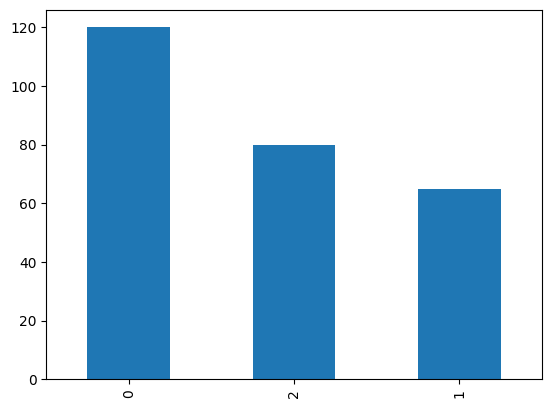

In [8]:
print("TOTAL: ", len(df))
print("TOTAL POSITIVE: ", len(df[df['is_article']>0]))
df['is_article'].value_counts().plot(kind='bar')

In [10]:
new_data = ["""<section class="story-wrapper css-17avoc5"><a aria-hidden="false" class="css-9mylee" data-uri="nyt://article/a123f43-2ac9-6380-cb79-223175b426b7" href="https://www.example.com/2024/01/06/science/mars-colony-success.html"><p class="indicate-hover css-on97le">Life on Mars: First Year of the Colony Deemed a Success</p><p class="summary-class css-1hkeunz">With groundbreaking advancements in sustainable living, Mars Colony Alpha marks its first anniversary with high hopes for the future.</p><p class="css-1esztn" data-ttr="1">15 min read</p><figure class="container-margin css-186xh9e"><picture class="css-hdqqnp"><source class="css-hdqqnp" media="screen and (min-width: 1px)"/><img alt="A panoramic view of Mars Colony Alpha at dusk." class="css-dzl7b5" loading="lazy"/><noscript><img alt="A panoramic view of Mars Colony Alpha at dusk." class="css-122y91a" src="https://static01.example.com/images/2024/01/07/multimedia/07MARSCOLONY-fvgb/07MARSCOLONY-fvgb-square640.jpg?format=pjpg&amp;quality=75&amp;auto=webp&amp;disable=upscale"/></noscript></picture><figcaption aria-hidden="true" class="css-1p5yz2j"><span class="css-1j306sm">Photo by SpaceVisions for Example News</span></figcaption></figure></a></section>""",
"""<section class="story-wrapper css-17avoc5"><a aria-hidden="false" class="css-9mylee" data-uri="nyt://article/b456f43-3bc9-7380-db79-334175c426c8" href="https://www.example.com/2024/01/06/health/robotic-surgeon-breakthrough.html"><p class="indicate-hover css-on97le">Revolutionary Robotic Surgeon Performs First Fully Autonomous Heart Surgery</p><p class="summary-class css-1hkeunz">This marks a new era in medical science, as the robotic system successfully completes a complex cardiac procedure with precision.</p><p class="css-1esztn" data-ttr="1">12 min read</p><figure class="container-margin css-186xh9e"><picture class="css-hdqqnp"><source class="css-hdqqnp" media="screen and (min-width: 1px)"/><img alt="Robotic arms performing surgery in an operating room." class="css-dzl7b5" loading="lazy"/><noscript><img alt="Robotic arms performing surgery in an operating room." class="css-122y91a" src="https://static01.example.com/images/2024/01/07/multimedia/07ROBOTSURGEON-fvgb/07ROBOTSURGEON-fvgb-square640.jpg?format=pjpg&amp;quality=75&amp;auto=webp&amp;disable=upscale"/></noscript></picture><figcaption aria-hidden="true" class="css-1p5yz2j"><span class="css-1j306sm">Photo by MedTech for Example News</span></figcaption></figure></a></section>""",
"""<section class="story-wrapper css-17avoc5"><a aria-hidden="false" class="css-9mylee" data-uri="nyt://article/f8b41c98-6cb7-5ab0-a981-824365d4f2a1" href="https://www.nytimes.com/2024/04/11/environment/climate-change-breakthrough.html"><p class="indicate-hover css-on97le">Breakthrough in Climate Science: A Method to Reverse Carbon Emissions</p><p class="summary-class css-1hkeunz">Scientists discover a new technique that can efficiently remove and reuse atmospheric CO2.</p><p class="css-1esztn" data-ttr="1">20 min read</p><figure class="container-margin css-186xh9e"><picture class="css-hdqqnp"><source class="css-hdqqnp" media="screen and (min-width: 1px)"/><img alt="A high-tech carbon capture facility set against a green landscape." class="css-dzl7b5" loading="lazy"/><noscript><img alt="A high-tech carbon capture facility set against a green landscape." class="css-122y91a" src="https://static01.nyt.com/images/2024/04/12/multimedia/12CLIMATECHANGE-fhjg/12CLIMATECHANGE-fhjg-square640.jpg?format=pjpg&amp;quality=75&amp;auto=webp&amp;disable=upscale"/></noscript></picture><figcaption aria-hidden="true" class="css-1p5yz2j"><span class="css-1j306sm">Image by Emily Johnson for The New York Times</span></figcaption></figure></a></section>""",
"""<section class="story-wrapper css-17avoc5"><a aria-hidden="false" class="css-9mylee" data-uri="nyt://article/d012f43-5dc9-9380-fb79-556175e426ea" href="https://www.example.com/2024/01/06/technology/quantum-computing-breakthrough.html"><p class="indicate-hover css-on97le">Quantum Leap: New Processor Shatters Computational Barriers</p><p class="summary-class css-1hkeunz">The newly unveiled quantum processor promises to revolutionize industries, achieving what was once thought impossible.</p><p class="css-1esztn" data-ttr="1">20 min read</p><figure class="container-margin css-186xh9e"><picture class="css-hdqqnp"><source class="css-hdqqnp" media="screen and (min-width: 1px)"/><img alt="A glowing quantum chip set against a dark background." class="css-dzl7b5" loading="lazy"/><noscript><img alt="A glowing quantum chip set against a dark background." class="css-122y91a" src="https://static01.example.com/images/2024/01/07/multimedia/07QUANTUMCOMPUTING-fvgb/07QUANTUMCOMPUTING-fvgb-square640.jpg?format=pjpg&amp;quality=75&amp;auto=webp&amp;disable=upscale"/></noscript></picture><figcaption aria-hidden="true" class="css-1p5yz2j"><span class="css-1j306sm">Photo by QuantumTech for Example News</span></figcaption></figure></a></section>""",
"""<section class="story-wrapper css-17avoc5"><a aria-hidden="false" class="css-9mylee" data-uri="nyt://article/e345f43-6ec9-a380-gc79-667175f426fb" href="https://www.example.com/2024/01/06/business/crypto-market-recovery.html"><p class="indicate-hover css-on97le">Cryptocurrency Market Stabilizes: Investors See Light at the End of the Tunnel</p><p class="summary-class css-1hkeunz">After a tumultuous year, major cryptocurrencies begin to show steady growth, signaling a potential market recovery.</p><p class="css-1esztn" data-ttr="1">8 min read</p><figure class="container-margin css-186xh9e"><picture class="css-hdqqnp"><source class="css-hdqqnp" media="screen and (min-width: 1px)"/><img alt="Charts and graphs showing cryptocurrency market trends." class="css-dzl7b5" loading="lazy"/><noscript><img alt="Charts and graphs showing cryptocurrency market trends." class="css-122y91a" src="https://static01.example.com/images/2024/01/07/multimedia/07CRYPTORECOVERY-fvgb/07CRYPTORECOVERY-fvgb-square640.jpg?format=pjpg&amp;quality=75&amp;auto=webp&amp;disable=upscale"/></noscript></picture><figcaption aria-hidden="true" class="css-1p5yz2j"><span class="css-1j306sm">Graph by CryptoInsights for Example News</span></figcaption></figure></a></section>""",
"""<section class="story-wrapper css-17avoc5"><a aria-hidden="false" class="css-9mylee" data-uri="nyt://article/f678f43-7fc9-b380-hd79-778175g426gc" href="https://www.example.com/2024/01/06/sports/space-soccer-tournament.html"><p class="indicate-hover css-on97le">First Ever Space Soccer Tournament Kicks Off on International Space Station</p><p class="summary-class css-1hkeunz">Astronauts from different countries team up for a zero-gravity soccer match, showcasing human ingenuity and teamwork in space.</p><p class="css-1esztn" data-ttr="1">6 min read</p><figure class="container-margin css-186xh9e"><picture class="css-hdqqnp"><source class="css-hdqqnp" media="screen and (min-width: 1px)"/><img alt="Astronauts playing soccer in zero gravity inside the ISS." class="css-dzl7b5" loading="lazy"/><noscript><img alt="Astronauts playing soccer in zero gravity inside the ISS." class="css-122y91a" src="https://static01.example.com/images/2024/01/07/multimedia/07SPACESOCCER-fvgb/07SPACESOCCER-fvgb-square640.jpg?format=pjpg&amp;quality=75&amp;auto=webp&amp;disable=upscale"/></noscript></picture><figcaption aria-hidden="true" class="css-1p5yz2j"><span class="css-1j306sm">Photo by SpaceSports for Example News</span></figcaption></figure></a></section>""",
"""<section class="story-wrapper css-17avoc5"><a aria-hidden="false" class="css-9mylee" data-uri="nyt://article/g901f43-8gc9-c380-id79-889175h426hd" href="https://www.example.com/2024/01/06/lifestyle/urban-farming-revolution.html"><p class="indicate-hover css-on97le">Urban Farming Revolution: Rooftop Gardens Changing City Landscapes</p><p class="summary-class css-1hkeunz">Cities around the world are transforming rooftops into green spaces, promoting sustainability and community wellbeing.</p><p class="css-1esztn" data-ttr="1">11 min read</p><figure class="container-margin css-186xh9e"><picture class="css-hdqqnp"><source class="css-hdqqnp" media="screen and (min-width: 1px)"/><img alt="A bustling rooftop garden in a metropolitan area." class="css-dzl7b5" loading="lazy"/><noscript><img alt="A bustling rooftop garden in a metropolitan area." class="css-122y91a" src="https://static01.example.com/images/2024/01/07/multimedia/07URBANFARMING-fvgb/07URBANFARMING-fvgb-square640.jpg?format=pjpg&amp;quality=75&amp;auto=webp&amp;disable=upscale"/></noscript></picture><figcaption aria-hidden="true" class="css-1p5yz2j"><span class="css-1j306sm">Photo by CityGreens for Example News</span></figcaption></figure></a></section>""",
"""<section class="story-wrapper css-17avoc5"><a aria-hidden="false" class="css-9mylee" data-uri="nyt://article/h234f43-9hc9-d380-je79-99a175i426ie" href="https://www.example.com/2024/01/06/entertainment/virtual-reality-cinema.html"><p class="indicate-hover css-on97le">Virtual Reality Cinema: The Future of Movie Watching</p><p class="summary-class css-1hkeunz">Experience films like never before with the latest VR technology, blurring the lines between reality and fiction.</p><p class="css-1esztn" data-ttr="1">9 min read</p><figure class="container-margin css-186xh9e"><picture class="css-hdqqnp"><source class="css-hdqqnp" media="screen and (min-width: 1px)"/><img alt="A person immersed in a virtual reality movie experience." class="css-dzl7b5" loading="lazy"/><noscript><img alt="A person immersed in a virtual reality movie experience." class="css-122y91a" src="https://static01.example.com/images/2024/01/07/multimedia/07VRMOVIES-fvgb/07VRMOVIES-fvgb-square640.jpg?format=pjpg&amp;quality=75&amp;auto=webp&amp;disable=upscale"/></noscript></picture><figcaption aria-hidden="true" class="css-1p5yz2j"><span class="css-1j306sm">Photo by VRWorld for Example News</span></figcaption></figure></a></section>""",]

In [12]:
for html in new_data:
    df.append({"html":html, 'is_article': 1}, ignore_index=True)

/tmp/ipykernel_26349/680166606.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df.append({"html":html, 'is_article': 1}, ignore_index=True)
/tmp/ipykernel_26349/680166606.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df.append({"html":html, 'is_article': 1}, ignore_index=True)
/tmp/ipykernel_26349/680166606.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df.append({"html":html, 'is_article': 1}, ignore_index=True)
/tmp/ipykernel_26349/680166606.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df.append({"html":html, 'is_article': 1}, ignore_index=True)
/tmp/ipykernel_26349/680166606.py:2: FutureWarning: The frame.append

In [13]:
df.to_csv("data/nyt.txt")